In [ ]:
# Policy QA RAG system flowchart

In [1]:
!apt-get install -y graphviz
!pip install graphviz


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.


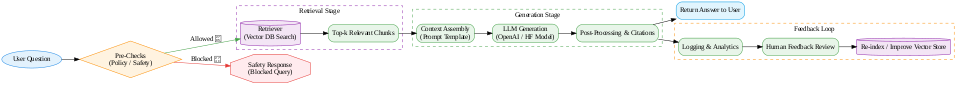

In [1]:
from graphviz import Digraph
from IPython.display import Image

# Initialize diagram
rag_flow = Digraph("RAG_Policy_QA", format="png")
rag_flow.attr(rankdir="LR", size="10,5", bgcolor="white")

# Define styles
user_style = {"shape": "oval", "style": "filled", "fillcolor": "#E3F2FD", "color": "#1E88E5"}
decision_style = {"shape": "diamond", "style": "filled", "fillcolor": "#FFF3E0", "color": "#FB8C00"}
process_style = {"shape": "box", "style": "filled,rounded", "fillcolor": "#E8F5E9", "color": "#43A047"}
db_style = {"shape": "cylinder", "style": "filled", "fillcolor": "#F3E5F5", "color": "#8E24AA"}
output_style = {"shape": "box", "style": "filled,rounded", "fillcolor": "#E1F5FE", "color": "#039BE5"}
alert_style = {"shape": "octagon", "style": "filled", "fillcolor": "#FFEBEE", "color": "#E53935"}

# --- Nodes ---
rag_flow.node("A", "User Question", **user_style)
rag_flow.node("B", "Pre-Checks\n(Policy / Safety)", **decision_style)
rag_flow.node("C", "Retriever\n(Vector DB Search)", **db_style)
rag_flow.node("D", "Top-k Relevant Chunks", **process_style)
rag_flow.node("E", "Context Assembly\n(Prompt Template)", **process_style)
rag_flow.node("F", "LLM Generation\n(OpenAI / HF Model)", **process_style)
rag_flow.node("G", "Post-Processing & Citations", **process_style)
rag_flow.node("H", "Return Answer to User", **output_style)
rag_flow.node("I", "Logging & Analytics", **process_style)
rag_flow.node("J", "Human Feedback Review", **process_style)
rag_flow.node("K", "Re-index / Improve Vector Store", **db_style)
rag_flow.node("X", "Safety Response\n(Blocked Query)", **alert_style)

# --- Edges ---
rag_flow.edge("A", "B")
rag_flow.edge("B", "C", label="Allowed ✅", color="#43A047")
rag_flow.edge("B", "X", label="Blocked ❌", color="#E53935")
rag_flow.edge("C", "D")
rag_flow.edge("D", "E")
rag_flow.edge("E", "F")
rag_flow.edge("F", "G")
rag_flow.edge("G", "H")
rag_flow.edge("G", "I")
rag_flow.edge("I", "J")
rag_flow.edge("J", "K")

# --- Subgraph clusters for clarity ---
with rag_flow.subgraph(name="cluster_retrieval") as c:
    c.attr(style="dashed", label="Retrieval Stage", color="#8E24AA")
    c.node("C")
    c.node("D")

with rag_flow.subgraph(name="cluster_generation") as c:
    c.attr(style="dashed", label="Generation Stage", color="#43A047")
    c.node("E")
    c.node("F")
    c.node("G")

with rag_flow.subgraph(name="cluster_feedback") as c:
    c.attr(style="dashed", label="Feedback Loop", color="#FB8C00")
    c.node("I")
    c.node("J")
    c.node("K")

# --- Render ---
rag_flow.render("/content/rag_policy_flowchart_colored", cleanup=True)
Image("/content/rag_policy_flowchart_colored.png")


In [ ]:
# 🗂️ Step 1 — Create the /content/policies folder and upload files automatically

In [2]:
import os

# Create a folder for policy files
policy_dir = "/content/policies"
os.makedirs(policy_dir, exist_ok=True)

# --- Employee Policy ---
employee_policy = """
Company Employee Policy Handbook
Version 1.2 – Effective: January 2025

SECTION 1: WORKING HOURS
Employees are expected to work 8 hours per day, Monday through Friday, with a flexible start time between 8:00 AM and 10:00 AM.
All employees must record their working hours using the company’s attendance system.

SECTION 2: LEAVE POLICY
2.1 Annual Leave
Full-time employees are entitled to 15 days of paid annual leave per calendar year.
Unused annual leave cannot be carried over to the next year unless approved by HR.

2.2 Sick Leave
Employees are entitled to 10 days of paid sick leave per year.
A medical certificate is required if an employee is absent for more than two consecutive days.

2.3 Parental Leave
Eligible employees are entitled to 12 weeks of parental leave.
During this period, the employee will receive 70% of their base salary.

SECTION 3: REMOTE WORK POLICY
Employees may work remotely up to 2 days per week, subject to managerial approval.
All remote work arrangements must ensure data confidentiality and compliance with IT security protocols.

SECTION 4: CODE OF CONDUCT
Employees are expected to maintain professional behavior and avoid conflicts of interest.
Discrimination, harassment, or any unethical conduct will result in disciplinary action.

SECTION 5: DATA PROTECTION
Employees must handle all customer and company data in accordance with the company’s data protection policy.
Sensitive data should never be transferred via unsecured communication channels.

SECTION 6: CONTACT
For any questions regarding these policies, please contact the HR Department at hr@company.com.
"""

# --- IT Security Policy ---
it_security_policy = """
IT Security Policy
Version 3.0 – Effective: March 2025

SECTION 1: PURPOSE
This policy outlines the minimum security requirements for all IT systems and data within the organization.

SECTION 2: PASSWORD MANAGEMENT
All employees must use passwords with at least 12 characters, including numbers, symbols, and both upper- and lowercase letters.
Passwords must not be reused across systems or shared with others.

SECTION 3: DEVICE SECURITY
All company devices must have disk encryption enabled.
Employees must report lost or stolen devices to IT Support within 24 hours.

SECTION 4: DATA ACCESS
Access to confidential data is granted on a need-to-know basis only.
Employees must log out or lock their computers when leaving their workspace.

SECTION 5: INCIDENT RESPONSE
Security incidents must be reported immediately to the IT Security Team via security@company.com.
A formal investigation will follow within 48 hours.

SECTION 6: REMOTE ACCESS
Remote access must occur through the company’s VPN and use multi-factor authentication (MFA).
Unauthorized access attempts may result in disciplinary action.
"""

# --- Diversity & Inclusion Policy ---
diversity_policy = """
Diversity & Inclusion Policy
Version 1.0 – Effective: April 2025

SECTION 1: PURPOSE
Our company is committed to building a diverse and inclusive workplace where all individuals are treated with respect and fairness.

SECTION 2: EQUAL OPPORTUNITY
We provide equal employment opportunities regardless of gender, age, race, ethnicity, religion, disability, or sexual orientation.
Recruitment, training, and promotions are based solely on merit.

SECTION 3: INCLUSIVE CULTURE
We encourage open dialogue, respect diverse perspectives, and support employee-led affinity groups.

SECTION 4: REPORTING DISCRIMINATION
Employees who experience or witness discrimination or harassment are encouraged to report it confidentially to inclusion@company.com.
All complaints will be reviewed by HR and addressed promptly.

SECTION 5: TRAINING
Mandatory diversity and inclusion training sessions are conducted annually for all staff.

SECTION 6: ACCOUNTABILITY
Leaders and managers are responsible for fostering inclusive practices in their teams.
Progress is reviewed annually by the HR Diversity Committee.
"""

# --- Save all files ---
with open(os.path.join(policy_dir, "employee_policy.txt"), "w") as f:
    f.write(employee_policy)

with open(os.path.join(policy_dir, "it_security_policy.txt"), "w") as f:
    f.write(it_security_policy)

with open(os.path.join(policy_dir, "diversity_policy.txt"), "w") as f:
    f.write(diversity_policy)

print("✅ Policy files created successfully in /content/policies/")

✅ Policy files created successfully in /content/policies/


In [ ]:
# 🧠 Step 1: Install Dependencies

In [3]:
!pip install faiss-cpu sentence-transformers openai tiktoken langchain langchain-community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.4/31.4 MB 33.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 37.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 4.8 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.32.4
    Uninstalling requests-2.32.4:
      Successfully uninstalled requests-2.32.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.32.4, but you have requests 2.32.5 which is incompatible.


In [ ]:
# 📂 Step 2: Load and Split Policy Documents

In [4]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import TextLoader
import os


# Example folder with .txt policy documents
policy_dir = "/content/policies"
os.makedirs(policy_dir, exist_ok=True)


# (You can upload policy files manually or mount Google Drive)


# Load all text files
docs = []
policy_files = [f for f in os.listdir(policy_dir) if f.endswith('.txt')]

if not policy_files:
    print("No policy files found in the directory.")
else:
    for file in policy_files:
        loader = TextLoader(os.path.join(policy_dir, file))
        docs.extend(loader.load())

    # Split into chunks
    splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=100)
    doc_chunks = splitter.split_documents(docs)
    print(f"Loaded {len(docs)} docs, split into {len(doc_chunks)} chunks.")

Loaded 3 docs, split into 6 chunks.


In [ ]:
# 🧭 Step 3: Create Embeddings & Vector Store (FAISS)

In [5]:
from langchain_community.vectorstores import FAISS
from langchain_community.embeddings import SentenceTransformerEmbeddings
from langchain_core.documents import Document

# Ensure doc_chunks is accessible (assuming it was defined in a previous cell)
if 'doc_chunks' not in locals() and 'doc_chunks' not in globals():
    print("Error: doc_chunks is not defined. Please run the previous cell to load and split documents.")
else:
    embedder = SentenceTransformerEmbeddings(model_name="all-MiniLM-L6-v2")

    texts = [chunk.page_content for chunk in doc_chunks]
    metadatas = [chunk.metadata for chunk in doc_chunks]

    documents = [Document(page_content=text, metadata=meta) for text, meta in zip(texts, metadatas)]

    # Build FAISS index
    import faiss
    index = FAISS.from_documents(documents, embedder)
    faiss.write_index(index.index, "policy_index.faiss")

/tmp/ipython-input-899367984.py:9: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embedder = SentenceTransformerEmbeddings(model_name="all-MiniLM-L6-v2")


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
# 🔍 Step 4: Define the Retriever

In [6]:
retriever = index.as_retriever(search_kwargs={"k":3})

In [ ]:
# 💬 Step 5: Assemble Context and Query the LLM

In [ ]:
from openai import OpenAI
import os
from google.colab import userdata

# Fetch the API key from Colab secrets
# To use this, go to the left panel, click the "🔑" icon,
# and add a new secret named OPENAI_API_KEY with your OpenAI API key as the value.
os.environ["OPENAI_API_KEY"] = userdata.get("OPENAI_API_KEY")
client = OpenAI()


def build_prompt(question, retrieved_docs):
    context = "\n\n".join([d.page_content for d in retrieved_docs])
    prompt = f"""You are a policy question answering assistant.
Use only the context below to answer the question accurately and concisely.
Include citations to document names when possible.


Context:
{context}


Question: {question}


Answer (include citations):
"""
    return prompt


def ask_policy_bot(question):
    retrieved_docs = retriever.get_relevant_documents(question)
    prompt = build_prompt(question, retrieved_docs)


    response = client.chat.completions.create(
        model="gpt-4o-mini",
        messages=[{"role": "user", "content": prompt}]
    )
    answer = response.choices[0].message.content
    print("Answer:\n", answer)
    print("\nSources:")
    for doc in retrieved_docs:
        print(doc.metadata.get('source', 'Unknown'))


# Example
ask_policy_bot("What is the employee leave policy for sick leave?")

RateLimitError: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}

In [ ]:
# (When openAI API hits up limit) Use a free open-source LLM instead (no API key needed)

# You can swap the OpenAI call with a local or Hugging Face model (e.g., mistral, llama, flan-t5) that runs directly in Colab.

In [7]:
!pip install transformers accelerate sentencepiece

from transformers import pipeline
import os
from google.colab import userdata

# Fetch the Hugging Face token from Colab secrets
# To use this, go to the left panel, click the "🔑" icon,
# and add a new secret named HF_TOKEN with your Hugging Face API token as the value.
hf_token = userdata.get("HF_TOKEN")
os.environ["HF_TOKEN"] = hf_token


# Load a smaller open-source model (runs on Colab CPU/GPU)
rag_model = pipeline("text-generation", model="mistralai/Mistral-7B-Instruct-v0.2", device_map="auto", token=hf_token)

def ask_policy_bot_offline(question):
    retrieved_docs = retriever.get_relevant_documents(question)
    context = "\n\n".join([d.page_content for d in retrieved_docs])
    prompt = f"Answer the question using only the context below. Include citations to sections.\n\nContext:\n{context}\n\nQuestion: {question}\n\nAnswer:"

    response = rag_model(prompt, max_new_tokens=300, do_sample=False)
    # The response format from the pipeline might be different, extract the generated text
    # Assuming the output is a list of dictionaries with 'generated_text' key
    answer = response[0]['generated_text']
    print("Answer:\n", answer)
    print("\nSources:")
    for doc in retrieved_docs:
        print(doc.metadata.get('source', 'Unknown'))

# Example
ask_policy_bot_offline("What is the employee sick leave policy?")

config.json:   0%|          | 0.00/596 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/25.1k [00:00<?, ?B/s]

Fetching 3 files:   0%|          | 0/3 [00:00<?, ?it/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/4.54G [00:00<?, ?B/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/4.94G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/111 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.10k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.80M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

Device set to use cuda:0
/tmp/ipython-input-36253836.py:18: LangChainDeprecationWarning: The method `BaseRetriever.get_relevant_documents` was deprecated in langchain-core 0.1.46 and will be removed in 1.0. Use :meth:`~invoke` instead.
  retrieved_docs = retriever.get_relevant_documents(question)
The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Answer:
 Answer the question using only the context below. Include citations to sections.

Context:
Company Employee Policy Handbook
Version 1.2 – Effective: January 2025

SECTION 1: WORKING HOURS
Employees are expected to work 8 hours per day, Monday through Friday, with a flexible start time between 8:00 AM and 10:00 AM.
All employees must record their working hours using the company’s attendance system.

SECTION 2: LEAVE POLICY
2.1 Annual Leave
Full-time employees are entitled to 15 days of paid annual leave per calendar year.
Unused annual leave cannot be carried over to the next year unless approved by HR.

2.2 Sick Leave
Employees are entitled to 10 days of paid sick leave per year.
A medical certificate is required if an employee is absent for more than two consecutive days.

2.3 Parental Leave
Eligible employees are entitled to 12 weeks of parental leave.
During this period, the employee will receive 70% of their base salary.

IT Security Policy
Version 3.0 – Effective: March 2

In [ ]:
# 🧾 Step 6: Evaluate and Log Feedback

In [8]:
feedback_log = []


def log_feedback(question, answer, rating, comments=""):
    feedback_log.append({
        "question": question,
        "answer": answer,
        "rating": rating,
        "comments": comments
    })


# Example usage
log_feedback("What is the remote work policy?", "Employees may work remotely 2 days/week.", rating=5)
print(feedback_log)

[{'question': 'What is the remote work policy?', 'answer': 'Employees may work remotely 2 days/week.', 'rating': 5, 'comments': ''}]


In [9]:
ask_policy_bot_offline("What is the password requirement in the IT security policy?")
ask_policy_bot_offline("How many days of annual leave are employees entitled to?")
ask_policy_bot_offline("What is the reporting process for workplace discrimination?")


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Answer:
 Answer the question using only the context below. Include citations to sections.

Context:
IT Security Policy
Version 3.0 – Effective: March 2025

SECTION 1: PURPOSE
This policy outlines the minimum security requirements for all IT systems and data within the organization.

SECTION 2: PASSWORD MANAGEMENT
All employees must use passwords with at least 12 characters, including numbers, symbols, and both upper- and lowercase letters.
Passwords must not be reused across systems or shared with others.

SECTION 3: DEVICE SECURITY
All company devices must have disk encryption enabled.
Employees must report lost or stolen devices to IT Support within 24 hours.

SECTION 4: DATA ACCESS
Access to confidential data is granted on a need-to-know basis only.
Employees must log out or lock their computers when leaving their workspace.

SECTION 5: INCIDENT RESPONSE
Security incidents must be reported immediately to the IT Security Team via security@company.com.
A formal investigation will foll

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Answer:
 Answer the question using only the context below. Include citations to sections.

Context:
Company Employee Policy Handbook
Version 1.2 – Effective: January 2025

SECTION 1: WORKING HOURS
Employees are expected to work 8 hours per day, Monday through Friday, with a flexible start time between 8:00 AM and 10:00 AM.
All employees must record their working hours using the company’s attendance system.

SECTION 2: LEAVE POLICY
2.1 Annual Leave
Full-time employees are entitled to 15 days of paid annual leave per calendar year.
Unused annual leave cannot be carried over to the next year unless approved by HR.

2.2 Sick Leave
Employees are entitled to 10 days of paid sick leave per year.
A medical certificate is required if an employee is absent for more than two consecutive days.

2.3 Parental Leave
Eligible employees are entitled to 12 weeks of parental leave.
During this period, the employee will receive 70% of their base salary.

IT Security Policy
Version 3.0 – Effective: March 2